# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [1]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
#skipped row 0 as it is duplicating the header in the first row
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = None, names = columns, skiprows=[0]))

# Get X and Y

Create the features data frame and target data.

Missing values in X:
 coord_x    0
coord_y    0
month      0
day        0
ffmc       0
dmc        0
dc         0
isi        0
temp       0
rh         0
wind       0
rain       0
dtype: int64
Missing values in y:
 0
Infinite values in X:
 coord_x    0
coord_y    0
month      0
day        0
ffmc       0
dmc        0
dc         0
isi        0
temp       0
rh         0
wind       0
rain       0
dtype: int64
Infinite values in y:
 0


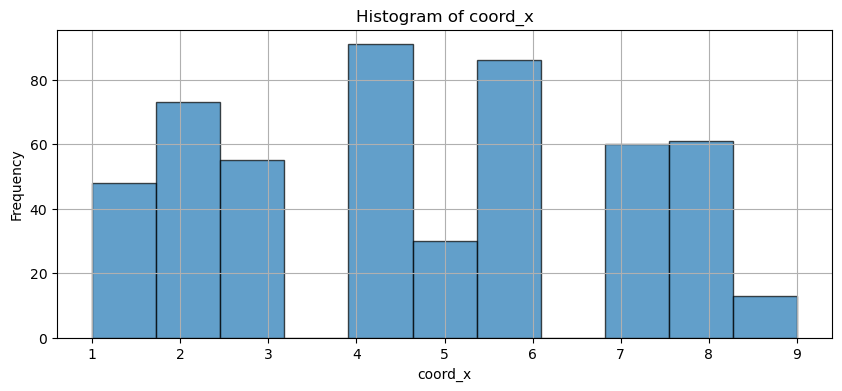

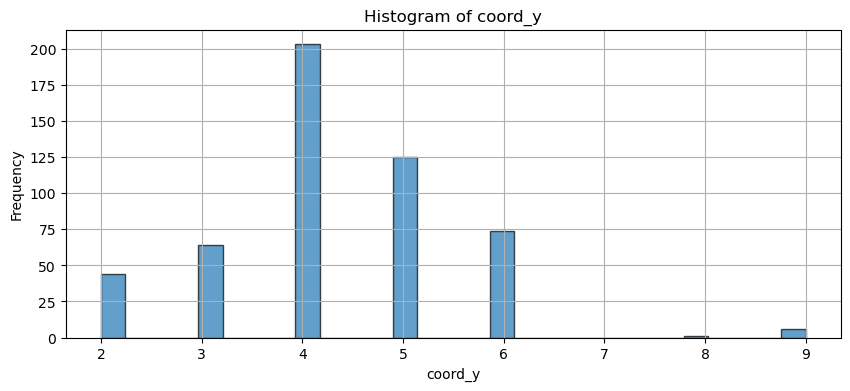

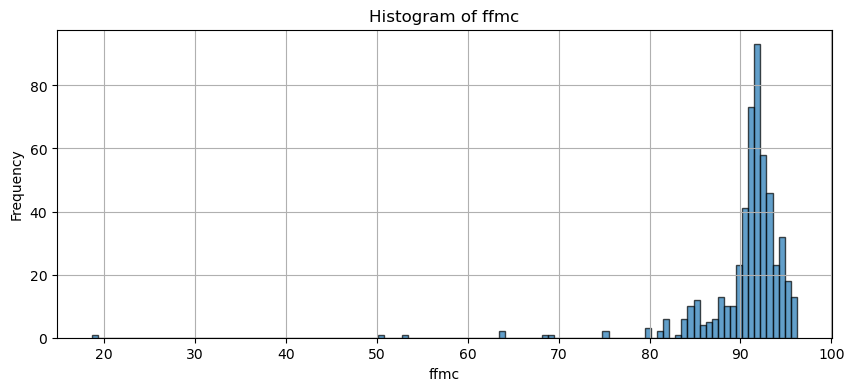

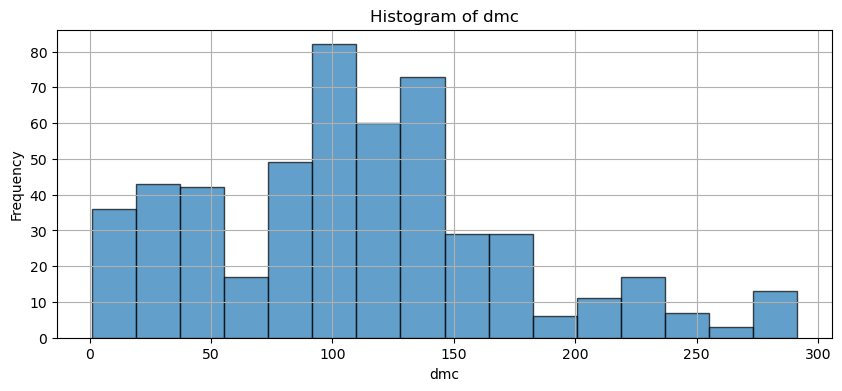

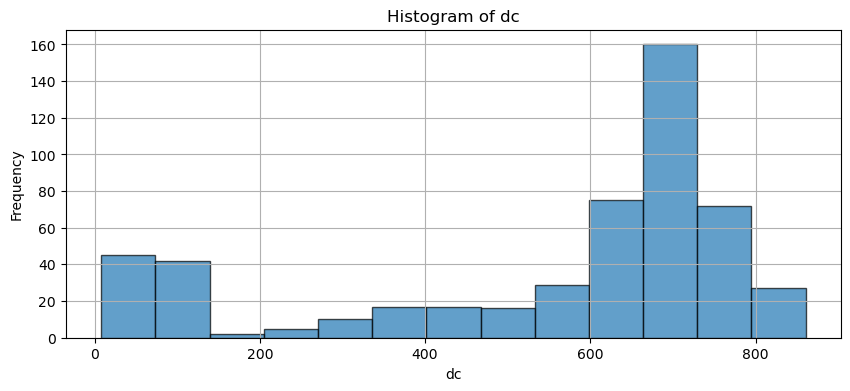

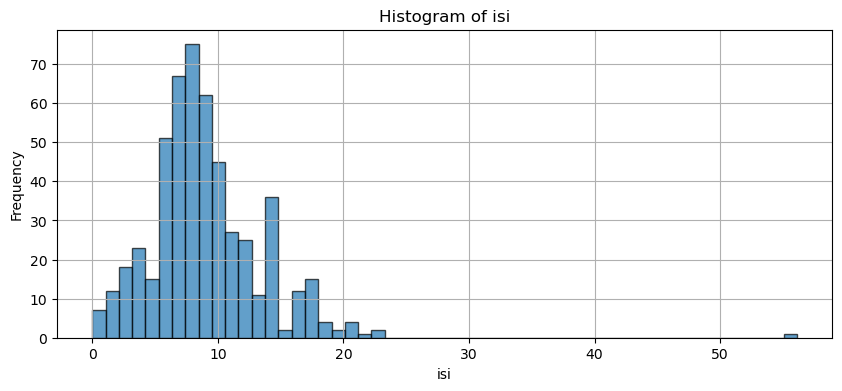

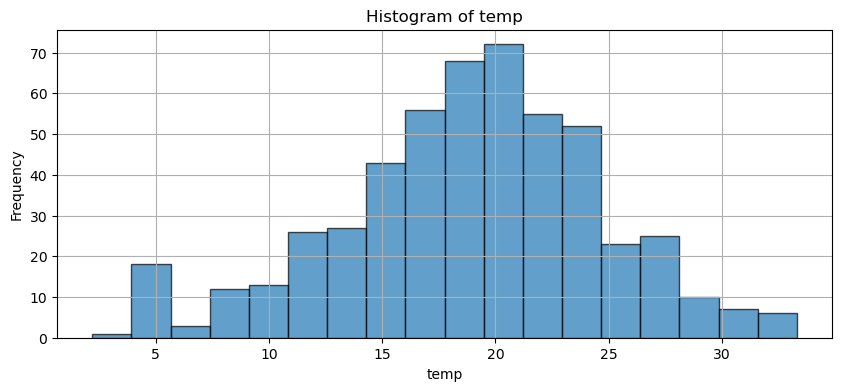

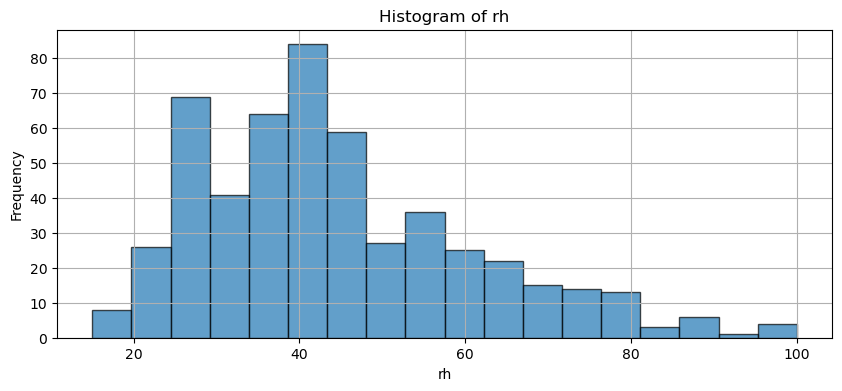

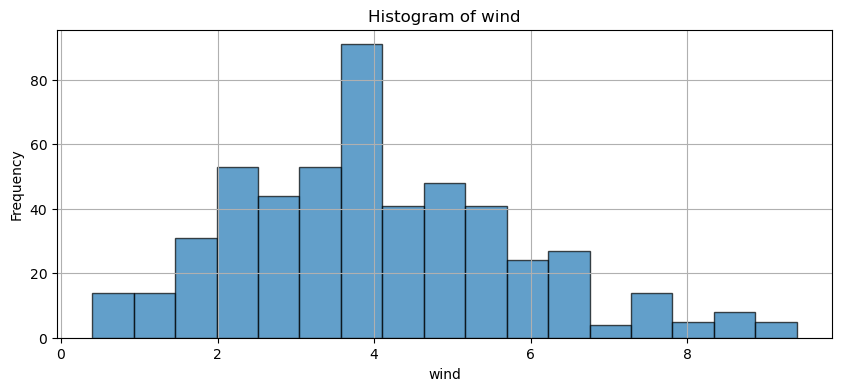

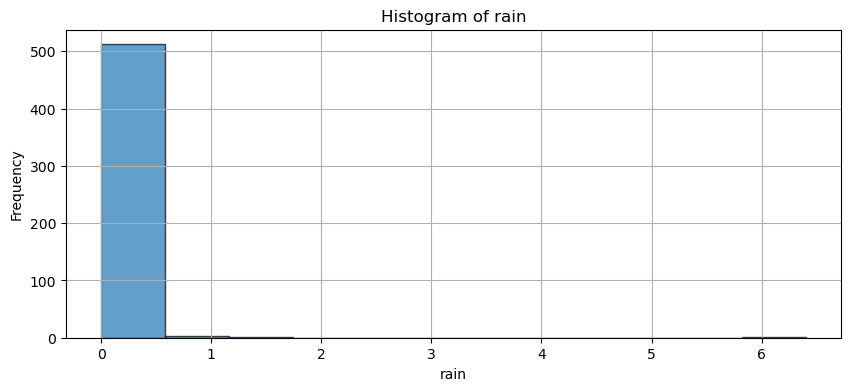

['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']


In [2]:
from sklearn.model_selection import train_test_split

#Target Variable is Area
X = fires_dt.drop('area', axis=1)
y = fires_dt['area']

fires_dt['month'] = fires_dt['month'].astype('category')
fires_dt['day'] = fires_dt['day'].astype('category')

# Define categorical and numeric features
categorical_features = ['month', 'day']
numeric_features = [col for col in X.columns if col not in categorical_features]

# Check for missing values in the dataset
print("Missing values in X:\n", X.isna().sum())
print("Missing values in y:\n", y.isna().sum())

print("Infinite values in X:\n", (X == float('inf')).sum())
print("Infinite values in y:\n", (y == float('inf')).sum())

#Visually checking distribution of numeric_features by Plotting histograms to determine best scaler option
import matplotlib.pyplot as plt
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    plt.hist(X[feature], bins='auto', edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.dtypes
print(numeric_features)

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer,MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

# preproc1
#Using robust scaler after inspection of histogram outliers affect the normality condition to apply standard scaler for most numeric features
preproc1 = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_features)
    ]
)

# Display the preprocessor
preproc1

ColumnTransformer(transformers=[('num', RobustScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [4]:
# preproc2

# For the non-linear transformation I'll use archsinh after trying several transformations. this 
# trasformation deals well with data that includes both positive and negative values, reduces skewness and
# is robust to outliers, all qualities of the numeric features per histograms above.

transformer = FunctionTransformer(np.arcsinh, validate=True)

#Using robust scaler after inspection of histogram outliers affect the normality condition to apply standard scaler for most numeric features
preproc2 = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', RobustScaler()),
            ('Arcsinh', transformer)
        ]), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_features)
    ]
)

# Display the preprocessor
preproc2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler()),
                                                 ('Arcsinh',
                                                  FunctionTransformer(func=<ufunc 'arcsinh'>,
                                                                      validate=True))]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Defining the regressor for baseline: I've chosen Linear regression as my baseline
# Pipeline A = preproc1 + baseline
pipeline_A = Pipeline(steps=[
    ('preprocessing', preproc1), 
    ('regressor', LinearRegression())
])
pipeline_A

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [6]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline(steps=[
    ('preprocessing', preproc2), 
    ('regressor', LinearRegression())
])
pipeline_B

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler()),
                                                                  ('Arcsinh',
                                                                   FunctionTransformer(func=<ufunc 'arcsinh'>,
                                                                                       validate=True))]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [7]:
# Defining the regressor for advanced: I've chosen Random Forest REGRESSION as my advanced model
# Pipeline C = preproc1 + advanced model
pipeline_C = Pipeline(steps=[
    ('preprocessing', preproc1), 
    ('regressor', RandomForestRegressor(random_state=42))
])
pipeline_C

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [8]:
# Pipeline D = preproc2 + advanced model
pipeline_D = Pipeline(steps=[
    ('preprocessing', preproc2), 
    ('regressor', RandomForestRegressor(random_state=42))
])
pipeline_D

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler()),
                                                                  ('Arcsinh',
                                                                   FunctionTransformer(func=<ufunc 'arcsinh'>,
                                                                                       validate=True))]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Linear Regression
param_grid_A = {
    'regressor__fit_intercept': [True, False]
}

# Setup GridSearchCV for Pipeline A
grid_search_A = GridSearchCV(estimator=pipeline_A, param_grid=param_grid_A, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search_A.fit(X_train, Y_train)

res_A = grid_search_A.cv_results_
res_A

res_A_df = pd.DataFrame(res_A)

#displaying Cross-validation results:
print('CROSS VALIDATION RESULTS PIPELINE A: ')
display(res_A_df[['mean_fit_time','std_fit_time','mean_score_time','std_score_time','param_regressor__fit_intercept','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score'))
print('BEST PARAMETERS PIPELINE A: ', grid_search_A.best_params_)
print('BEST MEAN TEST SCORE - NEG_MEAN_SQUARED ERROR PIPELINE A: ',res_A_df['mean_test_score'].iloc[0])
print('BEST ESTIMATOR PIPELINE A: ')
display(grid_search_A.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CROSS VALIDATION RESULTS PIPELINE A: 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__fit_intercept,mean_test_score,std_test_score,rank_test_score
0,0.037650,0.002912,0.008687,0.000747,True,-2234.763022,2566.958648,1
1,0.020002,0.005257,0.007157,0.002881,False,-2244.647576,2557.082111,2


BEST PARAMETERS PIPELINE A:  {'regressor__fit_intercept': True}
BEST MEAN TEST SCORE - NEG_MEAN_SQUARED ERROR PIPELINE A:  -2234.7630218685363
BEST ESTIMATOR PIPELINE A: 


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [10]:
# Define the parameter grid for Linear Regression
param_grid_B = {
    'regressor__fit_intercept': [True, False]
}

# Setup GridSearchCV for Pipeline B
grid_search_B = GridSearchCV(pipeline_B, param_grid_B, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search_B.fit(X_train, Y_train)

res_B = grid_search_B.cv_results_
res_B

res_B_df = pd.DataFrame(res_B)

#displaying Cross-validation results:
print('CROSS VALIDATION RESULTS PIPELINE B: ')
display(res_B_df[['mean_fit_time','std_fit_time','mean_score_time','std_score_time','param_regressor__fit_intercept','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score'))
print('BEST PARAMETERS PIPELINE B: ', grid_search_B.best_params_)
print('BEST MEAN TEST SCORE - NEG_MEAN_SQUARED ERROR PIPELINE B: ',res_B_df['mean_test_score'].iloc[0])
print('BEST ESTIMATOR PIPELINE B: ')
display(grid_search_B.best_estimator_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
CROSS VALIDATION RESULTS PIPELINE B: 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__fit_intercept,mean_test_score,std_test_score,rank_test_score
0,0.016392,0.001008,0.005837,0.001345,True,-2185.454218,2579.361701,1
1,0.016187,0.000410,0.007210,0.001081,False,-2185.979824,2571.389998,2


BEST PARAMETERS PIPELINE B:  {'regressor__fit_intercept': True}
BEST MEAN TEST SCORE - NEG_MEAN_SQUARED ERROR PIPELINE B:  -2185.4542181672005
BEST ESTIMATOR PIPELINE B: 


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler()),
                                                                  ('Arcsinh',
                                                                   FunctionTransformer(func=<ufunc 'arcsinh'>,
                                                                                       validate=True))]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [11]:
# Define the parameter grid for Random Forest Regressor
param_grid_C = {
    'regressor__n_estimators': [50, 100, 150, 200],
    'regressor__max_depth': [None, 10, 20, 30]
}

# Setup GridSearchCV for Pipeline C
grid_search_C = GridSearchCV(pipeline_C, param_grid_C, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search_C.fit(X_train, Y_train)

res_C = grid_search_C.cv_results_
res_C

res_C_df = pd.DataFrame(res_C)

#displaying Cross-validation results:
print('CROSS VALIDATION RESULTS PIPELINE C: ')
display(res_C_df[['mean_fit_time','std_fit_time','mean_score_time','std_score_time','param_regressor__max_depth','param_regressor__n_estimators','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score'))
print('BEST PARAMETERS PIPELINE C: ', grid_search_C.best_params_)
print('BEST MEAN TEST SCORE - NEG_MEAN_SQUARED ERROR PIPELINE C: ',res_C_df['mean_test_score'].iloc[0])
print('BEST ESTIMATOR PIPELINE C: ')
display(grid_search_C.best_estimator_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
CROSS VALIDATION RESULTS PIPELINE C: 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__n_estimators,mean_test_score,std_test_score,rank_test_score
5,0.544916,0.005677,0.017940,0.002738,10,100,-2763.350020,2532.093694,1
1,0.646055,0.005679,0.019932,0.006880,None,100,-2764.777240,2504.770837,2
13,0.645882,0.042777,0.018909,0.001450,30,100,-2764.777240,2504.770837,2
0,0.322663,0.014478,0.013901,0.001913,None,50,-2775.460410,2550.682946,4
12,0.321363,0.006035,0.012307,0.000910,30,50,-2775.460410,2550.682946,4
9,0.636652,0.019298,0.019326,0.002645,20,100,-2777.160457,2504.562839,6
4,0.274434,0.010414,0.012252,0.001876,10,50,-2784.904927,2561.582117,7
2,1.006127,0.021774,0.021321,0.001606,None,150,-2790.955167,2508.390233,8
14,0.972097,0.027690,0.023510,0.002385,30,150,-2790.955167,2508.390233,8
3,1.303408,0.035671,0.029954,0.001313,None,200,-2793.080553,2521.406270,10


BEST PARAMETERS PIPELINE C:  {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
BEST MEAN TEST SCORE - NEG_MEAN_SQUARED ERROR PIPELINE C:  -2775.4604095909745
BEST ESTIMATOR PIPELINE C: 


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, random_state=42))])

In [12]:
# Define the parameter grid for Random Forest Regressor
param_grid_D = {
    'regressor__n_estimators': [50, 100, 150, 200],
    'regressor__max_depth': [None, 10, 20, 30]
}

# Setup GridSearchCV for Pipeline D
grid_search_D = GridSearchCV(pipeline_D, param_grid_D, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search_D.fit(X_train, Y_train)

res_D = grid_search_D.cv_results_
res_D

res_D_df = pd.DataFrame(res_D)

#displaying Cross-validation results:
print('CROSS VALIDATION RESULTS PIPELINE D: ')
display(res_D_df[['mean_fit_time','std_fit_time','mean_score_time','std_score_time','param_regressor__max_depth','param_regressor__n_estimators','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score'))
print('BEST PARAMETERS PIPELINE D: ', grid_search_D.best_params_)
print('BEST MEAN TEST SCORE - NEG_MEAN_SQUARED ERROR PIPELINE D: ',res_D_df['mean_test_score'].iloc[0])
print('BEST ESTIMATOR PIPELINE D: ')
display(grid_search_D.best_estimator_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
CROSS VALIDATION RESULTS PIPELINE D: 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__n_estimators,mean_test_score,std_test_score,rank_test_score
5,0.646162,0.012467,0.023030,0.007537,10,100,-2840.363610,2504.171996,1
1,0.663417,0.012373,0.019018,0.003310,None,100,-2852.717301,2470.043562,2
13,0.881742,0.078051,0.028988,0.005537,30,100,-2852.717301,2470.043562,2
0,0.333695,0.008535,0.015168,0.001878,None,50,-2853.808884,2513.116778,4
12,0.443890,0.048299,0.023286,0.014272,30,50,-2853.808884,2513.116778,4
9,0.758868,0.041638,0.019611,0.002118,20,100,-2865.892597,2469.379897,6
3,1.676781,0.057473,0.034770,0.011491,None,200,-2867.592197,2487.336818,7
15,1.390060,0.172546,0.025191,0.006039,30,200,-2867.592197,2487.336818,7
2,1.248198,0.110932,0.027909,0.003670,None,150,-2874.222982,2468.682441,9
14,1.196113,0.038139,0.040143,0.017489,30,150,-2874.222982,2468.682441,9


BEST PARAMETERS PIPELINE D:  {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
BEST MEAN TEST SCORE - NEG_MEAN_SQUARED ERROR PIPELINE D:  -2853.8088835137614
BEST ESTIMATOR PIPELINE D: 


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler()),
                                                                  ('Arcsinh',
                                                                   FunctionTransformer(func=<ufunc 'arcsinh'>,
                                                                                       validate=True))]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, random_state=42))])

# Evaluate

+ Which model has the best performance?

**Answer**: The best performing model resulted from Pipeline B which in my case is Linear Regression preprocessing using Robust Scaler and Arcsinh non_linear transformation as explained in preproc2. Hyperparameter tuning of this model on intercept determined the presence of intercept to increase performance measured by negative mean squared error of -2185, which is the lowest of all models and cross validation splits.

# Export

+ Save the best performing model to a pickle file.

In [13]:
import pickle

# Save the best model in the current directory
with open('best_model_pipeline_B.pkl', 'wb') as f:
    pickle.dump(grid_search_B.best_estimator_, f)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


FEATURE IMPORTANCE FOR 21st OBSERVATION IN TEST SET: 


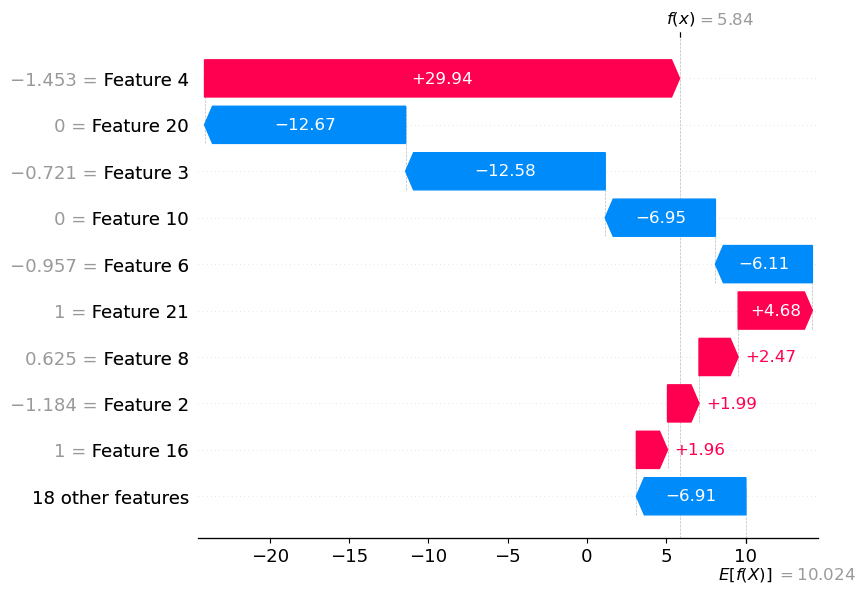

FEATURE IMPORTANCE FOR ENTIRE TRAINING SET: 


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


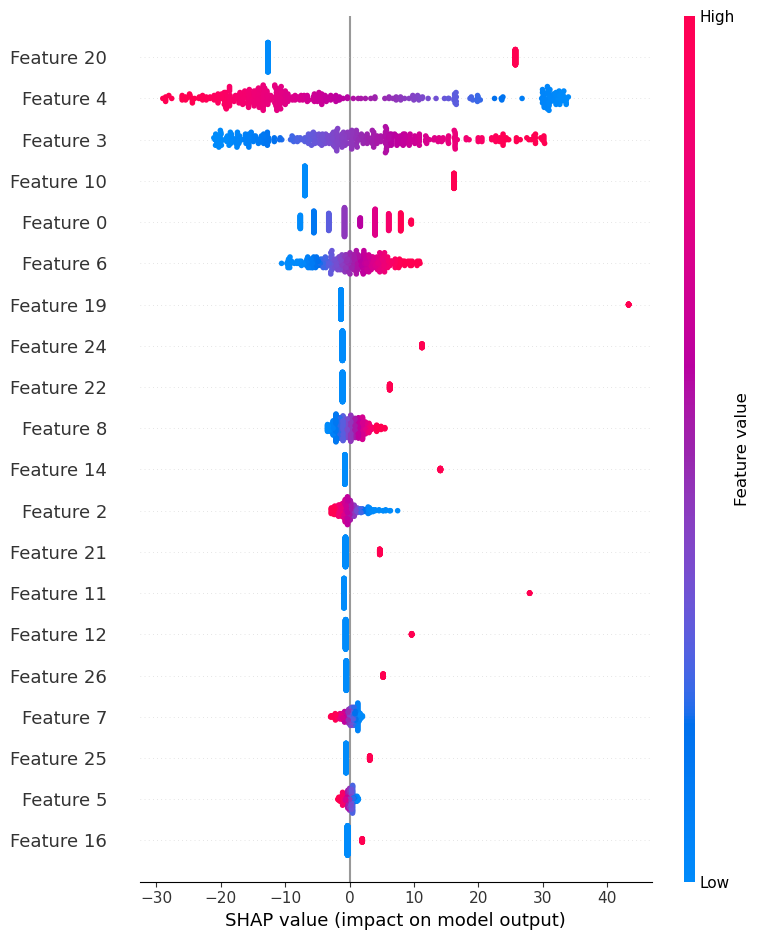

In [14]:
import shap
#Loading Best Model
with open('best_model_pipeline_B.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Create a SHAP explainer
explainer = shap.Explainer(best_model.named_steps['regressor'], best_model.named_steps['preprocessing'].transform(X_train))

# Selectes the 21st observation in the Test set
observation_index = 20 
X_test_transformed = best_model.named_steps['preprocessing'].transform(X_test)

# Ensure the observation is 1D
single_observation = X_test_transformed[observation_index].reshape(1, -1)
shap_values_single_test_observation = explainer(single_observation)

# Plot SHAP values for the specific observation
print('FEATURE IMPORTANCE FOR 21st OBSERVATION IN TEST SET: ')
shap.plots.waterfall(shap_values_single_test_observation[0])


# Compute SHAP values for the entire X_train set
X_train_transformed = best_model.named_steps['preprocessing'].transform(X_train)
shap_values_training_set = explainer(X_train_transformed)

# Generate a summary plot for feature importance across the training set
print('FEATURE IMPORTANCE FOR ENTIRE TRAINING SET: ')
shap.summary_plot(shap_values_training_set, X_train_transformed)

**Answer:** I would keep features 20, 4, 3, 10 and 0 based on feature importance and consider including Features 6, 8 and 2 that could add strength to the model and drop the rest. To best determine which features to keep (i.e. adding to model performance) I would Train models with different subsets of features and compare their performance in an iterative way. <br> NOTE: Because I used the arcsinh trasformation in my preprocessor I could not extract feature names using .get_feature_names_out() as it doesn't support this method. I was unable to figure a compact method of extracting the actual feature names but it is a learning point from this assignment to consider for future preprocessiong transformations.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.